In [15]:
import pathlib
import functools

import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

We begin by reading the data and summarizing the variables.

In [16]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0201.csv'
orig = pd.read_csv(path)
orig.describe()

,Year,Depth
count,178.00,178.00
mean,1977.00,9.80
std,1.00,1.03
min,1976.00,6.20
25%,1976.00,9.10
50%,1977.00,9.90
75%,1978.00,10.50
max,1978.00,11.70


In [35]:
pd.options.display.float_format = "{:.2f}".format
q25 = functools.partial(np.quantile, q=0.25)
q25.__name__ = 'q25'
q75 = functools.partial(np.quantile, q=0.75)
q75.__name__ = 'q75'
agg_fcns = ['count', np.min, q25, np.median, q75, np.max, np.mean, np.std]
sdf = orig.groupby('Year').agg(agg_fcns)
sdf

Depth                                        
     count amin  q25 median   q75  amax  mean  std
Year                                              
1976    89 6.20 8.90   9.70 10.20 11.70  9.47 1.04
1978    89 7.10 9.60  10.30 10.70 11.70 10.14 0.91

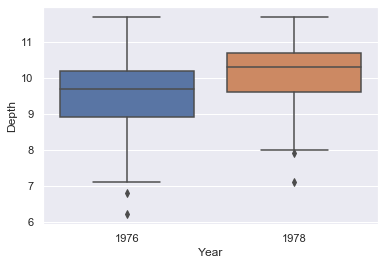

In [37]:
sns.boxplot(x='Year', y='Depth', data=orig)

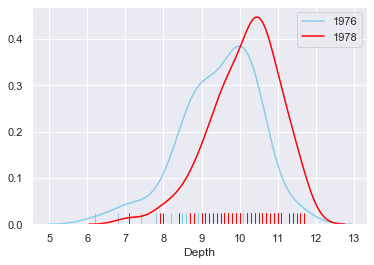

In [38]:
sns.distplot(orig.loc[orig.Year == 1976, 'Depth'], rug=True, hist=False, label='1976', color='skyblue')
sns.distplot(orig.loc[orig.Year == 1978, 'Depth'], rug=True, hist=False, label='1978', color='red')
plt.legend()

The distributions are approximately normal, with some evidence of a long tail.

In [39]:
a = orig.loc[orig.Year == 1976, 'Depth']
b = orig.loc[orig.Year == 1978, 'Depth']
t, p = scipy.stats.ttest_ind(a, b, equal_var=False)
print(t, p)

-4.583276019815881 8.739145345914434e-06


In [50]:
sp = np.sqrt( (sdf.loc[1976, ('Depth', 'std')] ** 2 + sdf.loc[1978, ('Depth', 'std')] ** 2) / 2)
se = sp * np.sqrt(2 / 178)
estimate = sdf.loc[1978, ('Depth', 'mean')] - sdf.loc[1976, ('Depth', 'mean')]
t95 = scipy.stats.t.ppf(0.975, 176)
ci = [estimate - t95 * se, estimate + t95 * se]
print(ci)

[0.46498485447765286, 0.8720937972077425]


The a two sided p-value of only 8.7e-6, there is not sufficient evidence to reject the null hypothesis.